# ЛАБОРАТОРНА РОБОТА №3
## Геометричні перетворення координат на площині


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.Задати вершини довільного опуклого 8-кутника на площині.

In [124]:
points = np.array([[2,5],[3,7],
                       [6,8],[8,7],
                       [9,5],[7,3],
                       [5,2],[3,3]])

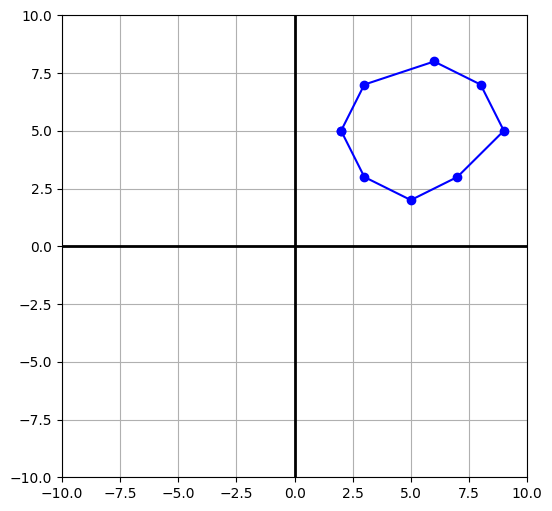

In [125]:
def plot(points, color):
    points = np.vstack([points, points[0]])    
    plt.plot(points[:, 0], points[:, 1], marker='o', color = color)  
    
plt.figure(figsize=(6,6))
plot(points, 'b')

plt.axhline(0, color='black', linewidth=2) 
plt.axvline(0, color='black', linewidth=2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid()
plt.show()

### Зменшити його в 1,5 рази.

In [126]:
def scale(points, scale):
    
    transformed_points = np.vstack((points.T, np.ones(points.shape[0])))
    centr = (np.mean(points, axis=0))
  
    s = 1/scale
    
    m1 = np.array([[1, 0, -1*centr[0]],
                  [0, 1, -1*centr[1]],
                  [0, 0 , 1]])
    
    m2 = np.array([[s, 0, 0],
                  [0, s, 0],
                  [0, 0 , 1]])
    
    m3 = np.array([[1, 0, centr[0]],
                  [0, 1, centr[1]],
                  [0, 0 , 1]])
    
    new_points = (m3@ (m2 @ (m1 @ transformed_points)))
    
    return new_points[:2].T

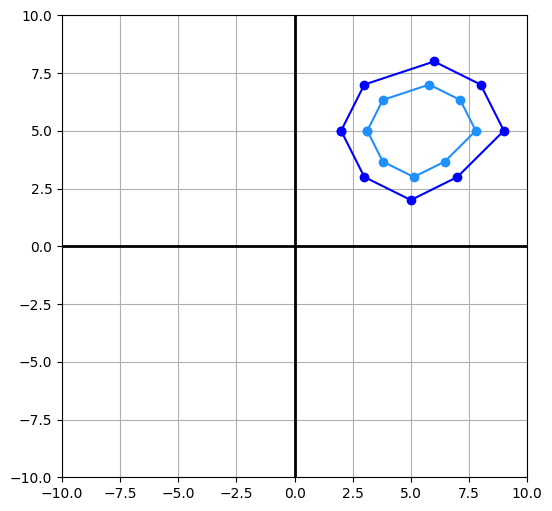

In [127]:
scaled_points = scale(points, 1.5)

plt.figure(figsize=(6,6))

plot(points, 'b',)
plot(scaled_points, 'DodgerBlue' )

plt.axhline(0, color='black', linewidth=2) 
plt.axvline(0, color='black', linewidth=2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid()
plt.show()

### 2.Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат.

In [128]:
def symetric_origin(points):
    
    points_t = np.vstack((points.T, np.ones(points.shape[0])))
    
    m1 = np.array([[-1, 0, 0],
                  [0, -1, 0],
                  [0, 0 , 1]])

    new_points = (m1 @ points_t)

    return new_points[:2].T


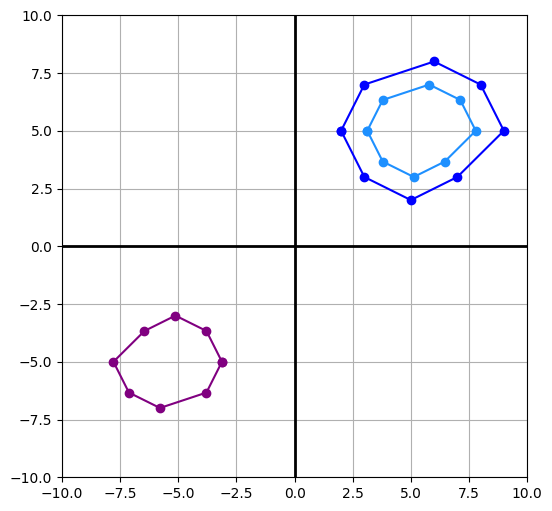

In [129]:
symetric_origin_octagon = symetric_origin(scaled_points)

plt.figure(figsize=(6,6))

plot(points, 'b')
plot(scaled_points, 'DodgerBlue')
plot(symetric_origin_octagon, 'Purple')

plt.axhline(0, color='black', linewidth=2) 
plt.axvline(0, color='black', linewidth=2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid()
plt.show()

### 3. Задати похилу пряму двома точками на площині. Симетрично відобразити 8-кутник відносно даної прямої. Вказати перетворення, які для цього необхідні.

In [131]:
def symetric_line(points, x1, y1, alpha):
    
    points_t = np.vstack((points.T, np.ones(points.shape[0])))
    
    m1 = np.array([[1, 0, -1 * x1 ],
                  [0, 1, -1 * y1 ],
                  [0, 0 , 1]])
    
    m2 = np.array([[np.cos(-1 * alpha), -1 * np.sin(-1 * alpha), 0],
                  [np.sin(-1 * alpha), np.cos(-1 * alpha), 0],
                  [0, 0 , 1]])
    
    m3 = np.array([[1, 0, 0 ],
                  [0, -1, 0 ],
                  [0, 0 , 1]])
    
    m4 = np.array([[np.cos(alpha), -1 * np.sin(alpha), 0],
                  [np.sin(alpha), np.cos( alpha), 0],
                  [0, 0 , 1]])
    
    m5 = np.array([[1, 0, x1 ],
                  [0, 1, y1 ],
                  [0, 0 , 1]])
    
    new_points = (m5 @ (m4 @ (m3 @ (m2 @ (m1 @ points_t)))))
    
    return new_points[:2].T

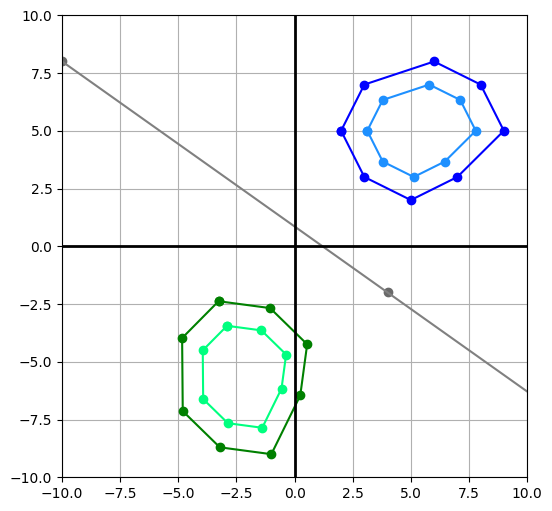

In [199]:
x1, y1 = np.random.randint(-10, 10, size=2) 
x2, y2 = np.random.randint(-10, 10, size=2)

def line(x1, y1, x2, y2):
    k = (y2 - y1) / (x2 - x1)
    b = y1 - k * x1
    alpha = np.arctan(k)
    return k, b, alpha

k, b, alpha = line(x1, y1, x2, y2)

x = np.linspace(-10, 10, 100)
y = k * x + b  

symetric_line_octagon = symetric_line(points, x1, y1, alpha)
symetric_line_scaled_octagon = symetric_line(scaled_points, x1, y1, alpha)

plt.figure(figsize=(6,6))

plot(points, 'b')
plot(scaled_points, 'DodgerBlue')
plot(symetric_line_octagon, 'g')
plot(symetric_line_scaled_octagon, 'SpringGreen')

plt.plot(x, y, 'Gray')
plt.scatter([x1, x2], [y1, y2], color='DimGray', label='Точки')
plt.axhline(0, color='black', linewidth=2) 
plt.axvline(0, color='black', linewidth=2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid()
plt.show()

### 4. Виконати те саме для іншого графічного об'єкут.

In [133]:
data = pd.read_excel("V7.xlsx")
coordinates = np.array(data[['X', 'Y']])
# print(coordinates)

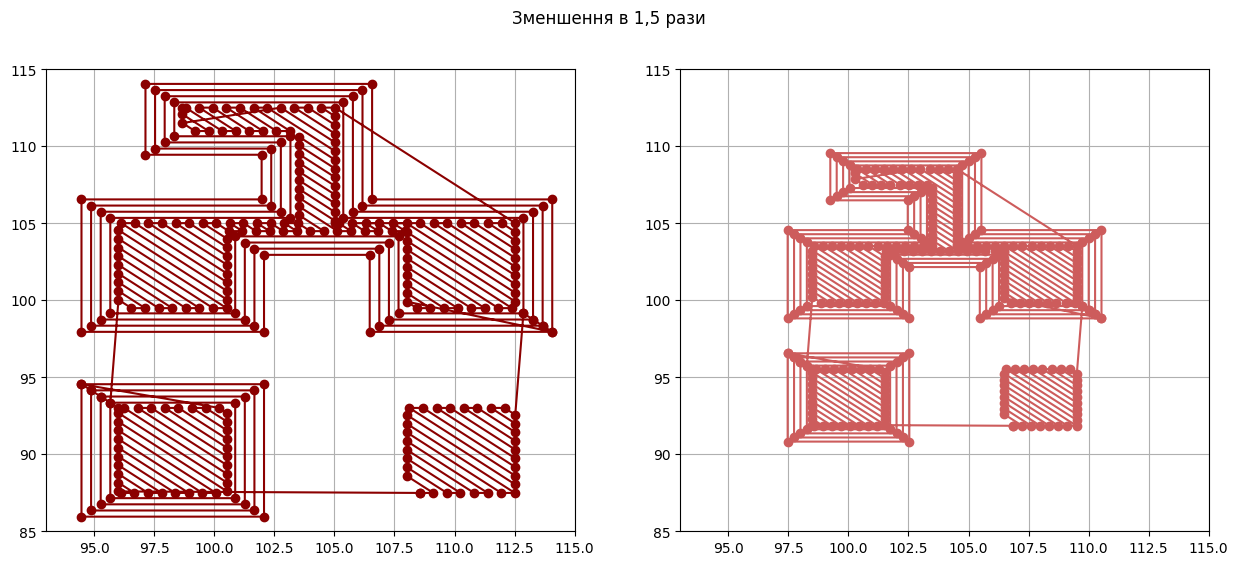

In [134]:
scaled_coordinates = scale(coordinates, 1.5)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plot(coordinates, 'DarkRed')
plt.xlim(93, 115)
plt.ylim(85, 115)
plt.grid()

plt.subplot(1, 2, 2)
plot(scaled_coordinates, 'IndianRed' )
plt.xlim(93, 115)
plt.ylim(85, 115)
plt.grid()

plt.suptitle("Зменшення в 1,5 рази")
plt.show()

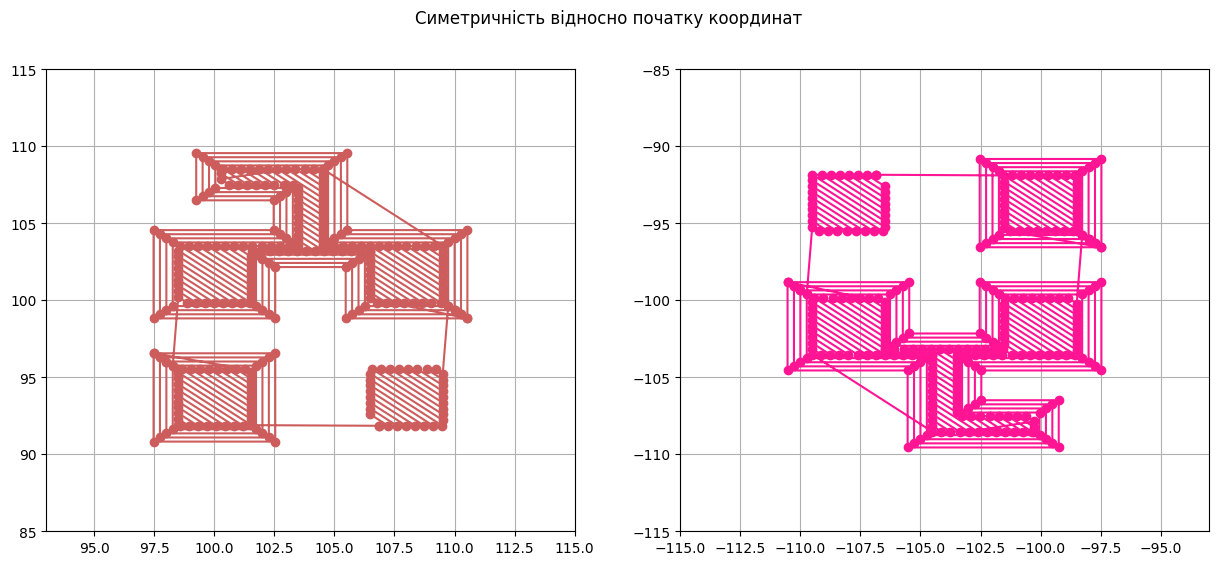

In [135]:
symetric_origin_coordinates = symetric_origin(scaled_coordinates)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plot(scaled_coordinates, 'IndianRed' )
plt.xlim(93, 115)
plt.ylim(85, 115)
plt.grid()

plt.subplot(1, 2, 2)
plot(symetric_origin_coordinates, 'DeepPink')
plt.xlim(-115, -93)
plt.ylim(-115, -85)
plt.grid()

plt.suptitle("Симетричність відносно початку координат")
plt.show()

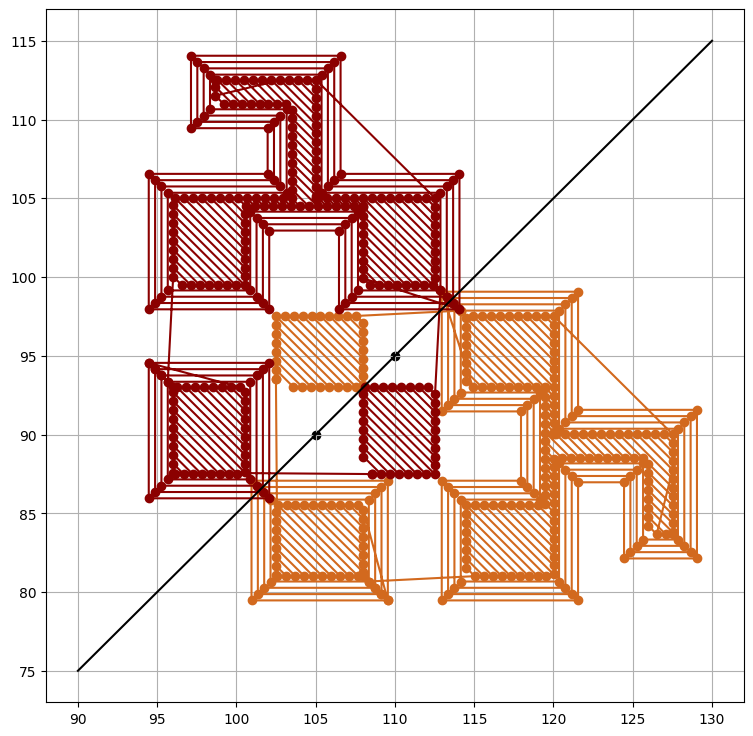

In [201]:
symetric_line_coordinates = symetric_line(coordinates, x1, y1, alpha)

x1, y1 = 105, 90
x2, y2 = 110, 95

def line(x1, y1, x2, y2):
    k = (y2 - y1) / (x2 - x1)
    b = y1 - k * x1
    alpha = np.arctan(k)
    return k, b, alpha

k, b, alpha = line(x1, y1, x2, y2)
x = np.linspace(90, 130, 100)
y = k * x + b  

plt.figure(figsize=(9,9))
plot(symetric_line_coordinates, 'Chocolate')
plot(coordinates, 'DarkRed')
plt.plot(x, y, 'k')
plt.scatter([x1, x2], [y1, y2], color='k', label='Точки')
plt.grid()
plt.show()